# Projet 04 : 

## Réalisez une étude de santé publique avec R ou Python

# Sommaire:

1. [Importation des librairies](#1.-Importation-des-librairies)    
2. [Importation data et nettoyage](#2.-Importation-data-et-nettoyage)    
    2.1 [Data disponibilité alimentaire](#2.1.-Data-disponibilité-alimentaire)    
    2.2 [Data  sous nutrition](#2.2.-Data-sous-nutrition)    
    2.3 [Data population](#2.3.-Data-population)    
    2.4 [Data aide alimentaire](#2.4.-Data-aide-alimentaire)    
3. [Selection data Année 2017](#3.-Selection-data-Année-2017)    
4. [Réponse aux questions](#4.-Réponse-aux-questions)    
    4.1 [Marc](#4.1.-Marc)   
    4.2 [Mélanie](#4.2.-Mélanie)    
    4.3 [Julien](#4.3.-Julien)         

# 1. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 2. Importation data et nettoyage

# 2.1. Data disponibilité alimentaire:

In [2]:
data_dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
data_dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Changement des noms des colonnes
data_dispo_alimentaire.rename(columns={'Zone':'Pays','Aliments pour animaux':'Aliments pour animaux (milliers de tonnes)','Autres Utilisations':'Autres Utilisations (milliers de tonnes)',
                    'Disponibilité intérieure':'Disponibilité intérieure (milliers de tonnes)','Exportations - Quantité':'Exportations (milliers de tonnes)',
                    'Importations - Quantité':'Importations (milliers de tonnes)','Nourriture':'Nourriture (milliers de tonnes)','Pertes':'Résidus (milliers de tonnes)',
                    'Production':'Production (milliers de tonnes)','Semences':'Semences (milliers de tonnes)','Traitement':'Transformés (milliers de tonnes)',
                    'Variation de stock':'Variation de stock (milliers de tonnes)'}, inplace=True)
data_dispo_alimentaire

,Pays,Produit,Origine,Aliments pour animaux (milliers de tonnes),Autres Utilisations (milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Exportations (milliers de tonnes),Importations (milliers de tonnes),Nourriture (milliers de tonnes),Résidus (milliers de tonnes),Production (milliers de tonnes),Semences (milliers de tonnes),Transformés (milliers de tonnes),Variation de stock (milliers de tonnes)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#Affichage des typeq des colonnes
data_dispo_alimentaire.dtypes

Pays                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux (milliers de tonnes)                       float64
Autres Utilisations (milliers de tonnes)                         float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure (milliers de tonnes)                    float64
Exportations (milliers de tonnes)                                float64
Importations (milliers de tonnes)                                float64
Nourriture (milliers de tonnes)                                  float64
Résidus (milliers de tonnes)                       

In [5]:
#Affichage des taux des valeurs manquantes
data_dispo_alimentaire.isna().mean()

Pays                                                             0.000000
Produit                                                          0.000000
Origine                                                          0.000000
Aliments pour animaux (milliers de tonnes)                       0.825697
Autres Utilisations (milliers de tonnes)                         0.647805
Disponibilité alimentaire (Kcal/personne/jour)                   0.087408
Disponibilité alimentaire en quantité (kg/personne/an)           0.101890
Disponibilité de matière grasse en quantité (g/personne/jour)    0.244217
Disponibilité de protéines en quantité (g/personne/jour)         0.259148
Disponibilité intérieure (milliers de tonnes)                    0.014290
Exportations (milliers de tonnes)                                0.216533
Importations (milliers de tonnes)                                0.048254
Nourriture (milliers de tonnes)                                  0.101890
Résidus (milliers de tonnes)          

In [6]:
#Recherche des doublons
data_dispo_alimentaire.duplicated(subset=['Pays','Produit','Origine']).sum()

0

# 2.2. Data  sous nutrition

In [7]:
data_sous_nutrition = pd.read_csv('sous_nutrition.csv')
data_sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [8]:
# Changement des appellations des colonnes et des intervalles d'années en année Moyenne
data_sous_nutrition = data_sous_nutrition.rename(columns={'Zone': 'Pays', 'Année': 'Année', 'Valeur':'Nombre sous nourris (Millions)'})
data_sous_nutrition = data_sous_nutrition.replace({'2012-2014':2013,'2013-2015':2014,'2014-2016':2015,'2015-2017':2016,'2016-2018':2017,'2017-2019':2018})
data_sous_nutrition

,Pays,Année,Nombre sous nourris (Millions)
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2014,NaN
1214,Zimbabwe,2015,NaN
1215,Zimbabwe,2016,NaN
1216,Zimbabwe,2017,NaN


In [9]:
#types colonnes
data_sous_nutrition.dtypes

Pays                              object
Année                              int64
Nombre sous nourris (Millions)    object
dtype: object

In [10]:
# Suppression des lignes contenant des valeurs nulles dans la colonne 'Nombre sous nourris (Millions)'
data_sous_nutrition = data_sous_nutrition.dropna(subset=['Nombre sous nourris (Millions)'])
# Affichage du DataFrame modifié
data_sous_nutrition

,Pays,Année,Nombre sous nourris (Millions)
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1195,Viet Nam,2014,8.3
1196,Viet Nam,2015,7.6
1197,Viet Nam,2016,7.1
1198,Viet Nam,2017,6.5


In [11]:
# Selection Data sous nutrition différentes à '<0.1'
data_sous_nutrition = data_sous_nutrition[data_sous_nutrition['Nombre sous nourris (Millions)']!='<0.1']
data_sous_nutrition

,Pays,Année,Nombre sous nourris (Millions)
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1195,Viet Nam,2014,8.3
1196,Viet Nam,2015,7.6
1197,Viet Nam,2016,7.1
1198,Viet Nam,2017,6.5


In [12]:
data_sous_nutrition.dtypes

Pays                              object
Année                              int64
Nombre sous nourris (Millions)    object
dtype: object

In [13]:
# Conversion du contenu de la colonne Nombre sous nourris (Milliers) en Numeric
data_sous_nutrition['Nombre sous nourris (Millions)']=data_sous_nutrition['Nombre sous nourris (Millions)'].astype(float)
data_sous_nutrition

C:\Users\Dell\AppData\Local\Temp\ipykernel_2548\3562859269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sous_nutrition['Nombre sous nourris (Millions)']=data_sous_nutrition['Nombre sous nourris (Millions)'].astype(float)


,Pays,Année,Nombre sous nourris (Millions)
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1195,Viet Nam,2014,8.3
1196,Viet Nam,2015,7.6
1197,Viet Nam,2016,7.1
1198,Viet Nam,2017,6.5


# Data population

In [14]:
# Importer donnnées population
print('données population')
data_population = pd.read_csv('population.csv')
data_population

données population


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [15]:
#les noms des colonnes
data_population = data_population.rename(columns={'Zone': 'Pays', 'Année': 'Année', 'Valeur':'Population (milliers d\'habitants)'})
data_population

,Pays,Année,Population (milliers d'habitants)
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [16]:
# La population mondiale annuelle
data_population['Population (milliers d\'habitants)'] = data_population['Population (milliers d\'habitants)'].astype(float)
population_mondiale_annee = data_population.groupby('Année')['Population (milliers d\'habitants)'].sum().div(1e6).values.reshape(-1,1)
population_mondiale_annee = pd.DataFrame(population_mondiale_annee, index=[2013, 2014, 2015, 2016, 2017, 2018], columns=['Population (milliards d\'habitants)'])
population_mondiale_annee

,Population (milliards d'habitants)
2013,7.210846
2014,7.295558
2015,7.380067
2016,7.464295
2017,7.548134
2018,7.631369


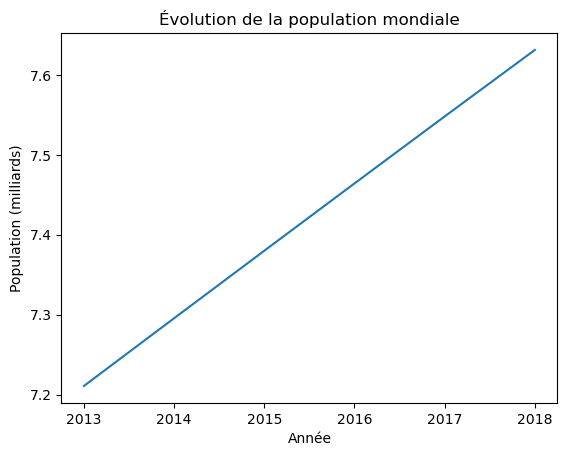

In [17]:
#Representation graphique
plt.plot(population_mondiale_annee.index, population_mondiale_annee['Population (milliards d\'habitants)'])
plt.title('Évolution de la population mondiale')
plt.xlabel('Année')
plt.ylabel('Population (milliards)')
plt.show()

# Data aide alimentaire

In [18]:
data_aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
data_aide_alimentaire

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [19]:
#Changement des Nom de colonnes
data_aide_alimentaire = data_aide_alimentaire.rename(columns = {'Pays bénéficiaire':'Pays','Valeur': 'quantité (tonnes)'})
data_aide_alimentaire

,Pays,Année,Produit,quantité (tonnes)
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


# 3. Selection data Année 2017

In [20]:
data_sous_nutrition17 = data_sous_nutrition[data_sous_nutrition['Année'] == 2017]
data_population17 = data_population[data_population['Année'] == 2017]
data_aide_alimentaire17 = data_aide_alimentaire[data_aide_alimentaire['Année'] == 2017]

# jointure

In [21]:
joint = pd.merge(data_population17,data_sous_nutrition17,on=['Pays','Année'])
joint ['Nombre sous nourris (Millions)'].replace('<0.1',np.nan,inplace=True)
joint['Nombre sous nourris (Millions)']=joint['Nombre sous nourris (Millions)'].astype(float)
joint.head()

,Pays,Année,Population (milliers d'habitants),Nombre sous nourris (Millions)
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Angola,2017,29816.766,5.8


# 4. Réponse aux questions

## 4.1. Marc

  a. [Proportion de personnes en état de sous-nutrition en 2017](#a.-Proportion-de-personnes-en-état-de-sous-nutrition-en-2017)   
  b. [Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale  en 2017](#b.-Nombre-théorique-de-personnes-qui-pourraient-être-nourries-à-partir-de-la-disponibilité-alimentaire-mondiale--en-2017)  
  c. [Nombre théorique de personnes qui pourraient être nourries en 2017 à partir de la disponibilité alimentaire mondiale d'origine végétale](#c.-Nombre-théorique-de-personnes-qui-pourraient-être-nourries-en-2017-à-partir-de-la-disponibilité-alimentaire-mondiale-d'origine-végétale)  
  d. [Utilisation de la disponibilité intérieure](#d.-Utilisation-de-la-disponibilité-intérieure)  
↶  [Sommaire ](#Sommaire:)   

### a. Proportion de personnes en état de sous-nutrition en 2017

↶ 4.1. [Marc](#4.1.-Marc) 

In [22]:
print('N.B: Le résultat obtenu ne concerne que les pays dont on a l\'information sur les personnes en état de sous nutition')
print('Proportion de personnes en sous nutrition dans le monde')
prop_sn_2017 = joint['Nombre sous nourris (Millions)'].astype(float).sum()*100 / (population_mondiale_annee.loc[2017]['Population (milliards d\'habitants)']*1000)
print('La proportion de personnes en sous nutrition dans le monde en 2017 est d\'environ',round(prop_sn_2017,2),'% Cela représente environ',prop_sn_2017*population_mondiale_annee.loc[2017]['Population (milliards d\'habitants)']*10,'millions de personnes.')

N.B: Le résultat obtenu ne concerne que les pays dont on a l'information sur les personnes en état de sous nutition
Proportion de personnes en sous nutrition dans le monde
La proportion de personnes en sous nutrition dans le monde en 2017 est d'environ 7.1 % Cela représente environ 535.7 millions de personnes.


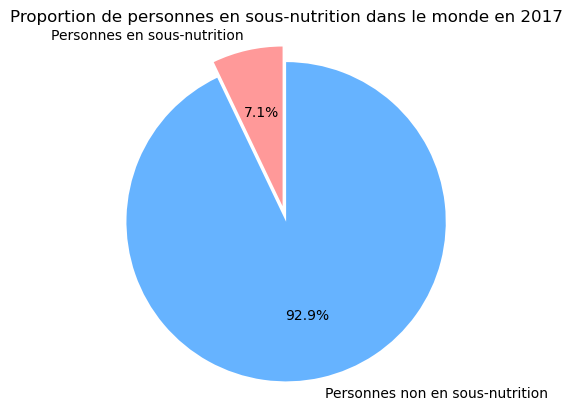

In [23]:
# Calcul de la proportion de personnes non en sous-nutrition dans le monde
prop_non_sn_2017 = 100 - prop_sn_2017
# Création du pie chart
labels = ['Personnes en sous-nutrition', 'Personnes non en sous-nutrition']
sizes = [prop_sn_2017, prop_non_sn_2017]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.pie(sizes, colors = colors, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Proportion de personnes en sous-nutrition dans le monde en 2017')
plt.axis('equal')
plt.show()

### b. Nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale  en 2017

↶ 4.1. [Marc](#4.1.-Marc) 

In [24]:
data_dispo_alim = pd.merge(data_dispo_alimentaire,data_population17, on='Pays')
data_dispo_alim

,Pays,Produit,Origine,Aliments pour animaux (milliers de tonnes),Autres Utilisations (milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Exportations (milliers de tonnes),Importations (milliers de tonnes),Nourriture (milliers de tonnes),Résidus (milliers de tonnes),Production (milliers de tonnes),Semences (milliers de tonnes),Transformés (milliers de tonnes),Variation de stock (milliers de tonnes),Année,Population (milliers d'habitants)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017,36296.113
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017,36296.113
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017,36296.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN,2017,636.039
15412,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN,2017,636.039
15413,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,636.039
15414,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,636.039


In [25]:
# Retrait des colonnes: 'Zone','Produit','Origine' et 'Disponibilité alimentaire' des données disponibilite_alimentaire
dispo_alim_pays = data_dispo_alim[['Pays','Produit','Origine','Disponibilité alimentaire (Kcal/personne/jour)','Population (milliers d\'habitants)']]
dispo_alim_pays

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population (milliers d'habitants)
0,Afghanistan,Abats Comestible,animale,5.0,36296.113
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296.113
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296.113
3,Afghanistan,Ananas,vegetale,0.0,36296.113
4,Afghanistan,Bananes,vegetale,4.0,36296.113
...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,45.0,636.039
15412,Îles Salomon,Viande de Volailles,animale,11.0,636.039
15413,Îles Salomon,"Viande, Autre",animale,0.0,636.039
15414,Îles Salomon,Vin,vegetale,0.0,636.039


In [26]:
# creation colonne 'Disponibilité alimentaire (Kcal/jour)
dispo_alim_pays['Disponibilité alimentaire (Kcal/jour)'] = dispo_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alim_pays['Population (milliers d\'habitants)']*1000
dispo_alim_pays[['Pays','Produit','Origine','Disponibilité alimentaire (Kcal/personne/jour)','Population (milliers d\'habitants)','Disponibilité alimentaire (Kcal/jour)']]

C:\Users\Dell\AppData\Local\Temp\ipykernel_2548\2552760340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_alim_pays['Disponibilité alimentaire (Kcal/jour)'] = dispo_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alim_pays['Population (milliers d\'habitants)']*1000


,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Population (milliers d'habitants),Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,5.0,36296.113,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296.113,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296.113,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,36296.113,0.0
4,Afghanistan,Bananes,vegetale,4.0,36296.113,145184452.0
...,...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,45.0,636.039,28621755.0
15412,Îles Salomon,Viande de Volailles,animale,11.0,636.039,6996429.0
15413,Îles Salomon,"Viande, Autre",animale,0.0,636.039,0.0
15414,Îles Salomon,Vin,vegetale,0.0,636.039,0.0


In [27]:
# Calcul disponibilité alimentaire mondiale en 2017 en kcal/jour
dispo_alim_mondiale_17 = dispo_alim_pays['Disponibilité alimentaire (Kcal/jour)'].sum()
dispo_alim_mondiale_17

20918984627331.0

In [28]:
print('La FAO a fixé le seuil de sous alimentation à 1800 Kcal/jour/personne mais le niveau recommandé de consommation énergétique alimentaire est de 2200 Kcal/jour (Source: https://www.lepoint.fr/monde/la-fao-defend-ses-chiffres-de-la-faim-29-11-2016-2086634_24.php)')
nb_theorique_personnes_nourries = dispo_alim_mondiale_17/2200
print('Théoriquement on peut nourrir',round(nb_theorique_personnes_nourries),'personnes avec la disponibilité totale en 2017.')

La FAO a fixé le seuil de sous alimentation à 1800 Kcal/jour/personne mais le niveau recommandé de consommation énergétique alimentaire est de 2200 Kcal/jour (Source: https://www.lepoint.fr/monde/la-fao-defend-ses-chiffres-de-la-faim-29-11-2016-2086634_24.php)
Théoriquement on peut nourrir 9508629376 personnes avec la disponibilité totale en 2017.


### c. Nombre théorique de personnes qui pourraient être nourries en 2017 à partir de la disponibilité alimentaire mondiale d'origine végétale

↶ 4.1. [Marc](#4.1.-Marc) 

In [29]:
#Calcul de la disponibilité végétale
dispo_alim_vegetale_mondiale_17= dispo_alim_pays[dispo_alim_pays['Origine']=='vegetale']['Disponibilité alimentaire (Kcal/jour)'].sum()
round(dispo_alim_vegetale_mondiale_17)

17260764211501

In [30]:
print('La FAO a fixé le seuil de sous alimentation à 1800 Kcal/jour/personne mais le niveau recommandé de consommation énergétique alimentaire est de 2200 Kcal/jour (Source: https://www.lepoint.fr/monde/la-fao-defend-ses-chiffres-de-la-faim-29-11-2016-2086634_24.php)')
nb_theorique_personnes_nourries_vegetale = dispo_alim_vegetale_mondiale_17/2200
print('Théoriquement on peut nourrir',round(nb_theorique_personnes_nourries_vegetale),'personnes avec la disponibilité totale en 2017.')

La FAO a fixé le seuil de sous alimentation à 1800 Kcal/jour/personne mais le niveau recommandé de consommation énergétique alimentaire est de 2200 Kcal/jour (Source: https://www.lepoint.fr/monde/la-fao-defend-ses-chiffres-de-la-faim-29-11-2016-2086634_24.php)
Théoriquement on peut nourrir 7845801914 personnes avec la disponibilité totale en 2017.


In [31]:
#Calcul de la disponibilité animale
dispo_alim_animale_mondiale_17= dispo_alim_pays[dispo_alim_pays['Origine']=='animale']['Disponibilité alimentaire (Kcal/jour)'].sum()
round(dispo_alim_animale_mondiale_17)

3658220415830

In [32]:
print('La FAO a fixé le seuil de sous alimentation à 1800 Kcal/jour/personne mais le niveau recommandé de consommation énergétique alimentaire est de 2200 Kcal/jour (Source: https://www.lepoint.fr/monde/la-fao-defend-ses-chiffres-de-la-faim-29-11-2016-2086634_24.php)')
nb_theorique_personnes_nourries_animale = dispo_alim_animale_mondiale_17/2200
print('Théoriquement on peut nourrir',round(nb_theorique_personnes_nourries_animale),'personnes avec la disponibilité totale en 2017.')

La FAO a fixé le seuil de sous alimentation à 1800 Kcal/jour/personne mais le niveau recommandé de consommation énergétique alimentaire est de 2200 Kcal/jour (Source: https://www.lepoint.fr/monde/la-fao-defend-ses-chiffres-de-la-faim-29-11-2016-2086634_24.php)
Théoriquement on peut nourrir 1662827462 personnes avec la disponibilité totale en 2017.


In [33]:
dispo_alim_mondiale_2017 = np.array([[dispo_alim_vegetale_mondiale_17], [dispo_alim_animale_mondiale_17]])
dispo_alimentaire_mondiale_2017 = pd.DataFrame(dispo_alim_mondiale_2017, index=['Végétale','Animale'], columns=['Disponibilité alimentaire mondiale (Kcal/j)'])
dispo_alimentaire_mondiale_2017

,Disponibilité alimentaire mondiale (Kcal/j)
Végétale,1.726076e+13
Animale,3.658220e+12


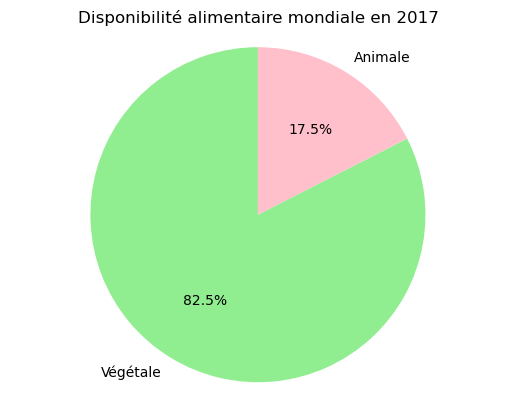

In [67]:
#représentation graphique des résultats
labels = ['Végétale', 'Animale']
sizes = [dispo_alim_vegetale_mondiale_17, dispo_alim_animale_mondiale_17]
colors = ['lightgreen', 'Pink']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Disponibilité alimentaire mondiale en 2017')
plt.show()

### d. Utilisation de la disponibilité intérieure

↶ 4.1. [Marc](#4.1.-Marc) 

In [35]:
#Calculer de la disponibilité intérieure mondiale 
dispo_inter_mond = data_dispo_alimentaire['Disponibilité intérieure (milliers de tonnes)'].sum()
a = round((dispo_inter_mond/1e6))
dispo_inter_mond

9848994.0

In [36]:
#Vérification que la Disponibilité Intérieure = A = Production . Importation - Exportation +Variation de stock 
A = data_dispo_alimentaire['Production (milliers de tonnes)'].sum()+data_dispo_alimentaire['Importations (milliers de tonnes)'].sum()-data_dispo_alimentaire['Exportations (milliers de tonnes)'].sum()+data_dispo_alimentaire['Variation de stock (milliers de tonnes)'].sum() 
b = round((A/1e6))
A

9849173.0

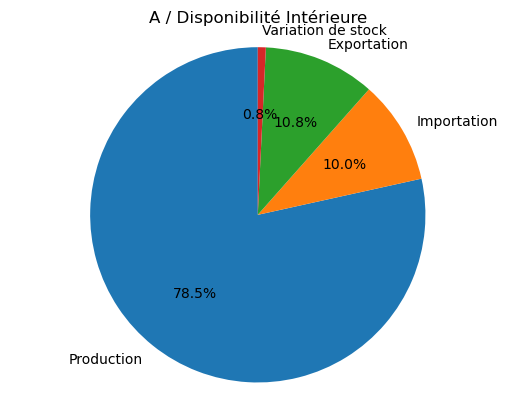

In [85]:
production = round(data_dispo_alimentaire['Production (milliers de tonnes)'].sum()/dispo_inter_mond,2)
importation = round(data_dispo_alimentaire['Importations (milliers de tonnes)'].sum()/dispo_inter_mond,2)
exportation = round(data_dispo_alimentaire['Exportations (milliers de tonnes)'].sum()/dispo_inter_mond,2)
variation_stock = round(data_dispo_alimentaire['Variation de stock (milliers de tonnes)'].sum()/dispo_inter_mond,2)
valuesA=[production,importation,exportation,variation_stock]

valuesA = values = [abs(x) for x in valuesA]
labelsA = ['Production', 'Importation', 'Exportation', 'Variation de stock']
colorsA = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots()
ax.pie(valuesA, labels=labelsA, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('A / Disponibilité Intérieure')
plt.show()

In [38]:
#Vérifier que la Disponibilité Intérieure = B = Aliments pour animaux + Nourriture + Traitemert + Semences + Autres Utilisations . Pertes 
B=data_dispo_alimentaire['Aliments pour animaux (milliers de tonnes)'].sum()+data_dispo_alimentaire['Nourriture (milliers de tonnes)'].sum()+data_dispo_alimentaire['Semences (milliers de tonnes)'].sum()+data_dispo_alimentaire['Transformés (milliers de tonnes)'].sum()+data_dispo_alimentaire['Autres Utilisations (milliers de tonnes)'].sum()+data_dispo_alimentaire['Résidus (milliers de tonnes)'].sum()
c = round((B/1e6))
B

9858592.0

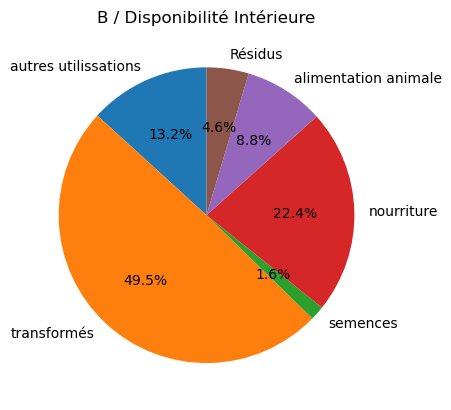

In [104]:
alim_anim = data_dispo_alimentaire['Aliments pour animaux (milliers de tonnes)'].sum()
nourriture = data_dispo_alimentaire['Nourriture (milliers de tonnes)'].sum()
semences = data_dispo_alimentaire['Semences (milliers de tonnes)'].sum()
transformés = data_dispo_alimentaire['Transformés (milliers de tonnes)'].sum()
autr_utils = data_dispo_alimentaire['Autres Utilisations (milliers de tonnes)'].sum()
résidus = data_dispo_alimentaire['Résidus (milliers de tonnes)'].sum()
valuesB=[alim_anim,nourriture,semences,transformés,autr_utils,résidus]

valuesB = values = [abs(x) for x in valuesB]
labelsB = ['autres utilissations','transformés','semences','nourriture','alimentation animale','Résidus']
colorsB = ['yellow', 'gray', 'lightblue', 'black', 'pink', 'brown']

fig, ax = plt.subplots()
ax.pie(valuesB, labels=labelsB, autopct='%1.1f%%', startangle=90)

plt.title('B / Disponibilité Intérieure')
plt.show()

In [40]:
print( b == a == c )

True


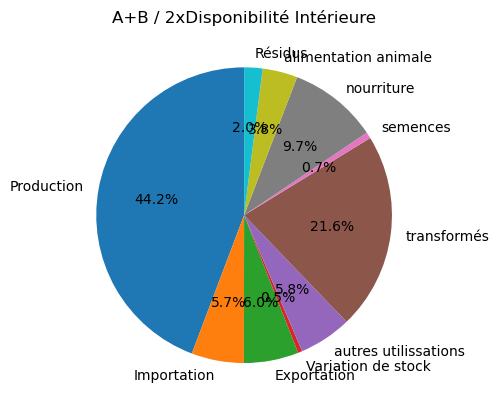

In [103]:
production = data_dispo_alimentaire['Production (milliers de tonnes)'].sum()
importation = data_dispo_alimentaire['Importations (milliers de tonnes)'].sum()
exportation = data_dispo_alimentaire['Exportations (milliers de tonnes)'].sum()
variation_stock = data_dispo_alimentaire['Variation de stock (milliers de tonnes)'].sum()
alim_anim = data_dispo_alimentaire['Aliments pour animaux (milliers de tonnes)'].sum()
nourriture = data_dispo_alimentaire['Nourriture (milliers de tonnes)'].sum()
semences = data_dispo_alimentaire['Semences (milliers de tonnes)'].sum()
transformés = data_dispo_alimentaire['Transformés (milliers de tonnes)'].sum()
autr_utils = data_dispo_alimentaire['Autres Utilisations (milliers de tonnes)'].sum()
résidus = data_dispo_alimentaire['Résidus (milliers de tonnes)'].sum()
values=[production,importation,exportation,variation_stock,alim_anim,nourriture,semences,transformés,autr_utils,résidus]
values = values = [abs(x) for x in values]
labels = ['Production', 'Importation', 'Exportation', 'Variation de stock','autres utilissations','transformés','semences','nourriture','alimentation animale','Résidus']
colors = ['blue', 'green', 'red', 'purple', 'yellow', 'gray', 'lightblue', 'black', 'pink', 'brown']
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('A+B / 2xDisponibilité Intérieure')
plt.show()

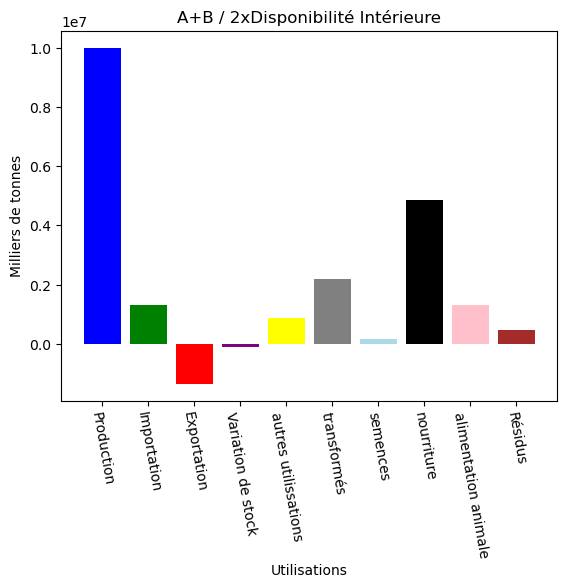

In [98]:
production = data_dispo_alimentaire['Production (milliers de tonnes)'].sum()
importation = data_dispo_alimentaire['Importations (milliers de tonnes)'].sum()
exportation = data_dispo_alimentaire['Exportations (milliers de tonnes)'].sum()
variation_stock = data_dispo_alimentaire['Variation de stock (milliers de tonnes)'].sum()
alim_anim = data_dispo_alimentaire['Aliments pour animaux (milliers de tonnes)'].sum()
nourriture = data_dispo_alimentaire['Nourriture (milliers de tonnes)'].sum()
semences = data_dispo_alimentaire['Semences (milliers de tonnes)'].sum()
transformés = data_dispo_alimentaire['Transformés (milliers de tonnes)'].sum()
autr_utils = data_dispo_alimentaire['Autres Utilisations (milliers de tonnes)'].sum()
résidus = data_dispo_alimentaire['Résidus (milliers de tonnes)'].sum()

values = [production, importation, -exportation, variation_stock, autr_utils, transformés, semences, nourriture, alim_anim, résidus]
labels = ['Production', 'Importation', 'Exportation', 'Variation de stock','autres utilissations','transformés','semences','nourriture','alimentation animale','Résidus']
colors = ['blue', 'green', 'red', 'purple', 'yellow', 'gray', 'lightblue', 'black', 'pink', 'brown']

for i, v in enumerate(values):
    ax.text(i, v+0.5, str(v), ha='center')
    
plt.bar(labels, values, color=colors)
plt.title('A+B / 2xDisponibilité Intérieure')
plt.xticks(rotation=-80)
plt.xlabel('Utilisations')
plt.ylabel('Milliers de tonnes')
plt.show()

## 4.2. Mélanie

  a. [Les pays ou la proportion de personnes sous-alimentées a été la plus forte en 2017](#a.-Les-pays-pour-lesquels-la-proportion-de-personnes-sous-alimentées-a-été-la-plus-forte-en-2017)  
  b. [Pays ayant le plus bénéficié d'aides depuis 2013](#b.-Pays-ayant-le-plus-bénéficié-d'aides-depuis-2013)  
  c. [Pays ayant le plus / moins de disponibilité par habitant](#c.-Pays-ayant-le-plus-/-moins-de-disponibilité-par-habitant)  
  [Sommaire](#Sommaire:)   

In [43]:
data_sous_nutrition17

,Pays,Année,Nombre sous nourris (Millions)
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
40,Angola,2017,5.8
...,...,...,...
1126,Togo,2017,1.6
1156,Turkménistan,2017,0.2
1174,Ukraine,2017,1.5
1192,Venezuela (République bolivarienne du),2017,8.0


In [44]:
joint2=pd.merge(data_sous_nutrition17,data_population17,on=['Pays','Année'])
joint2

,Pays,Année,Nombre sous nourris (Millions),Population (milliers d'habitants)
0,Afghanistan,2017,10.5,36296.113
1,Afrique du Sud,2017,3.1,57009.756
2,Albanie,2017,0.1,2884.169
3,Algérie,2017,1.3,41389.189
4,Angola,2017,5.8,29816.766
...,...,...,...,...
79,Togo,2017,1.6,7698.474
80,Turkménistan,2017,0.2,5757.667
81,Ukraine,2017,1.5,44487.709
82,Venezuela (République bolivarienne du),2017,8.0,29402.484


### a. Les pays pour lesquels la proportion de personnes sous-alimentées a été la plus forte en 2017

↶  4.2. [Mélanie](#4.2.-Mélanie) 

In [45]:
# Pays avec la proportion des personnes sous alimentées est la plus forte en 2017
Pourcentage = round((joint2['Nombre sous nourris (Millions)'].loc[joint2['Nombre sous nourris (Millions)'] != '<0.1'].astype(float)*1000*100 / joint2['Population (milliers d\'habitants)']),2)
prop_sn_2017_pays = pd.DataFrame({'Pays':joint2['Pays'],
                                  'Pourcentage par pays (%)':Pourcentage,
                                  'Population':round(joint2['Population (milliers d\'habitants)']*Pourcentage,)})
prop_non_sn_2017_sorted = prop_sn_2017_pays.sort_values(by='Pourcentage par pays (%)', ascending=False).head(20)
prop_non_sn_2017_sorted

,Pays,Pourcentage par pays (%),Population
32,Haïti,48.26,530009.0
67,République populaire démocratique de Corée,47.19,1200033.0
45,Madagascar,41.06,1049925.0
44,Libéria,38.28,180001.0
42,Lesotho,38.25,80001.0
76,Tchad,37.96,570036.0
69,Rwanda,35.06,420052.0
53,Mozambique,32.81,939974.0
78,Timor-Leste,32.17,39996.0
0,Afghanistan,28.93,1050047.0


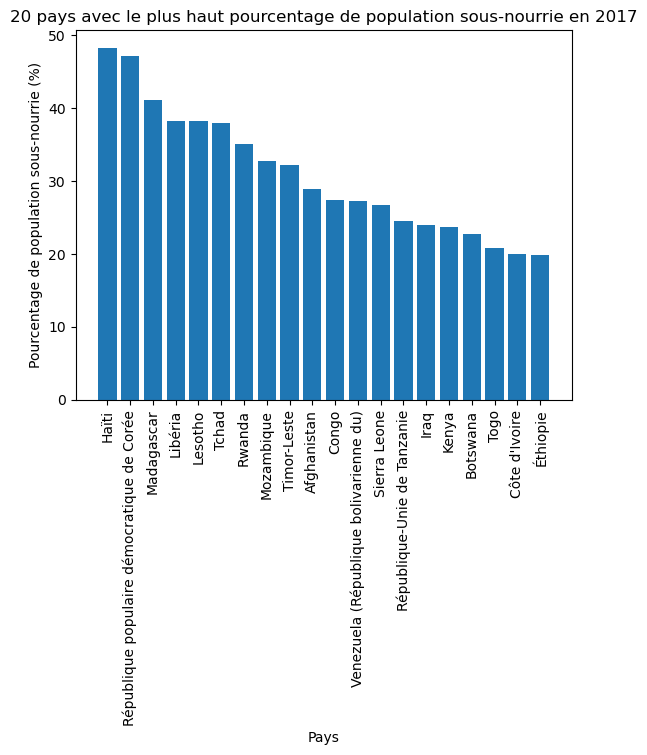

In [46]:
# Représentation graphique
plt.bar(prop_non_sn_2017_sorted['Pays'], prop_non_sn_2017_sorted['Pourcentage par pays (%)'])
plt.xticks(rotation=90)
plt.xlabel('Pays')
plt.ylabel('Pourcentage de population sous-nourrie (%)')
plt.title('20 pays avec le plus haut pourcentage de population sous-nourrie en 2017')
plt.show()

### b. Pays ayant le plus bénéficié d'aides depuis 2013

4.2 [Mélanie](#4.2.-Mélanie) 

In [47]:
aide_par_pays = data_aide_alimentaire[['Pays','quantité (tonnes)']].groupby('Pays').sum().reset_index()
pays_plus_aide = aide_par_pays.sort_values(by=['quantité (tonnes)'], ascending=False).iloc[:][['Pays','quantité (tonnes)']]
pays_plus_aide

,Pays,quantité (tonnes)
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
...,...,...
73,Égypte,1122
69,Vanuatu,802
67,Timor-Leste,116
24,Géorgie,70


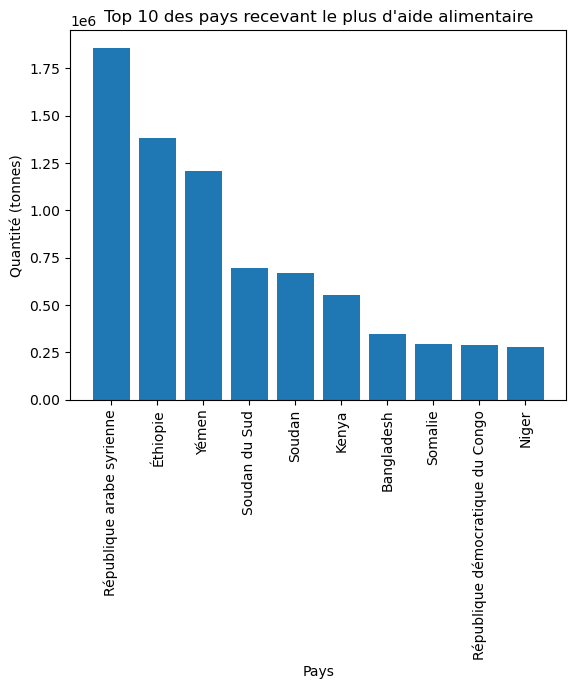

In [48]:
# Représentation graphique
# Récupérer les 10 premiers pays
top_pays_aide = pays_plus_aide.head(10)

# Créer un graphique en barres
plt.bar(top_pays_aide['Pays'], top_pays_aide['quantité (tonnes)'])

# Personnaliser le graphique
plt.title('Top 10 des pays recevant le plus d\'aide alimentaire')
plt.xlabel('Pays')
plt.xticks(rotation=90)
plt.ylabel('Quantité (tonnes)')
plt.grid(False)

# Afficher le graphique
plt.show()

### c. Pays ayant le plus / moins de disponibilité par habitant

4.2 [Mélanie](#4.2.-Mélanie) 

In [49]:
# Calcul de la disponibilité alimentaire par habitant pour chaque pays
data_aide_alimentaire = data_aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Pays'})
# Calculer la disponibilité alimentaire par habitant
data_dispo_alimentaire_habitant = dispo_alim_pays.groupby(['Pays']).sum()
data_dispo_alimentaire_habitant['Disponibilité alimentaire(Kcal/personne/jour)'] = round(data_dispo_alimentaire_habitant['Disponibilité alimentaire (Kcal/jour)']/data_dispo_alimentaire_habitant['Population (milliers d\'habitants)'],2)
data_dispo_alimentaire_habitant_sort = data_dispo_alimentaire_habitant.sort_values(by='Disponibilité alimentaire(Kcal/personne/jour)',ascending=False)
#print('Le pays qui a la plus grande disponibilité par habitant:',
les_20_pays_plus = data_dispo_alimentaire_habitant[['Disponibilité alimentaire (Kcal/personne/jour)']].sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(20)
les_20_pays_plus

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


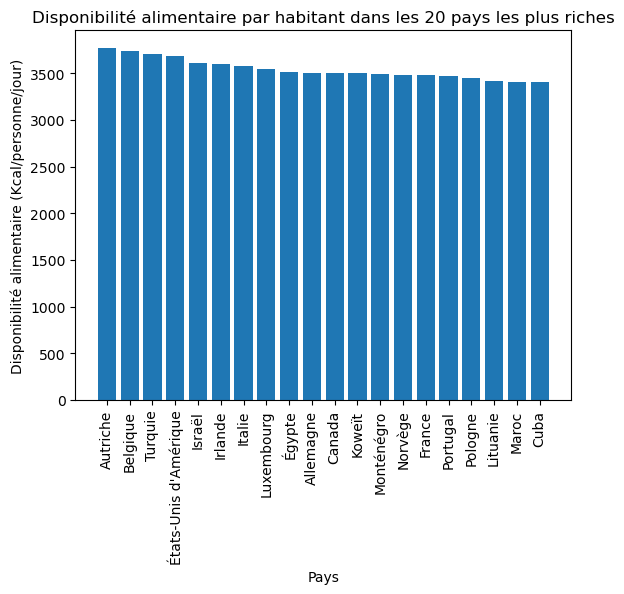

In [50]:
#Représentation graphique
# Créer le graphique à barres
plt.bar(les_20_pays_plus.index, les_20_pays_plus['Disponibilité alimentaire (Kcal/personne/jour)'])

# Ajouter un titre et des labels pour les axes
plt.title('Disponibilité alimentaire par habitant dans les 20 pays les plus riches')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')

# Faire pivoter les labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

In [51]:
#print('Le pays qui a la plus grande disponibilité par habitant:',
les_20_pays_moins= data_dispo_alimentaire_habitant[['Disponibilité alimentaire (Kcal/personne/jour)']].sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(20)
les_20_pays_moins

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


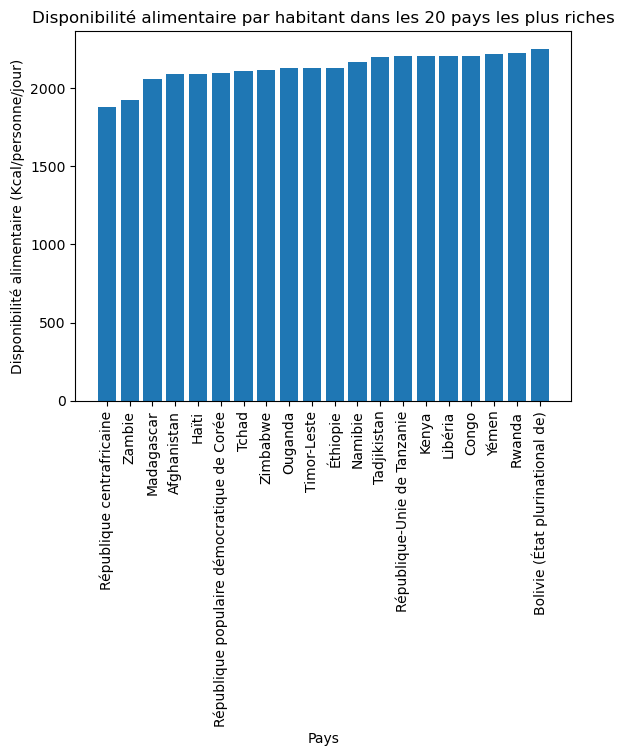

In [52]:
#Repr"sentation graphique
# Créer le graphique à barres
plt.bar(les_20_pays_moins.index, les_20_pays_moins['Disponibilité alimentaire (Kcal/personne/jour)'])

# Ajouter un titre et des labels pour les axes
plt.title('Disponibilité alimentaire par habitant dans les 20 pays les plus riches')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')

# Faire pivoter les labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

## 4.3. Julien

  a. [Utilisation des céréales](#a.-Utilisation-des-céréales)  
  b. [Répartition de la disponibilité entre l'alimentation humaine et animale](#b.-Répartition-de-la-disponibilité-entre-l'alimentation-humaine-et-animale)  
  c. [Uilisation du Manioc](#c.-Uilisation-du-Manioc)  
  [Sommaire](#Sommaire:)   

### a. Utilisation des céréales

4.3 [Julien](#4.3.-Julien) 

In [53]:
dispo_interieure_pays = data_dispo_alimentaire[['Pays','Produit','Origine','Disponibilité intérieure (milliers de tonnes)','Production (milliers de tonnes)','Importations (milliers de tonnes)','Exportations (milliers de tonnes)','Variation de stock (milliers de tonnes)','Aliments pour animaux (milliers de tonnes)','Nourriture (milliers de tonnes)','Semences (milliers de tonnes)','Transformés (milliers de tonnes)','Autres Utilisations (milliers de tonnes)','Résidus (milliers de tonnes)']].groupby('Pays')

In [54]:
# Charger les données de disponibilité alimentaire
dispo_interieure_pays = data_dispo_alimentaire[['Pays','Produit','Origine','Disponibilité intérieure (milliers de tonnes)','Production (milliers de tonnes)','Importations (milliers de tonnes)','Exportations (milliers de tonnes)','Variation de stock (milliers de tonnes)','Aliments pour animaux (milliers de tonnes)','Nourriture (milliers de tonnes)','Semences (milliers de tonnes)','Transformés (milliers de tonnes)','Autres Utilisations (milliers de tonnes)','Résidus (milliers de tonnes)']]
Cereales=['Avoine','Blé','Seigle','Sorgho','Céréales, Autres','Maïs','Millet','Orge','Riz (Eq Blanchi)']
dispo_interieure_cereales_pays = dispo_interieure_pays[dispo_interieure_pays['Produit'].isin(Cereales)]
dispo_interieure_cereales_pays = dispo_interieure_cereales_pays.groupby(['Pays','Produit']).sum()
dispo_interieure_cereales_pays

Disponibilité intérieure (milliers de tonnes)  \
Pays         Produit                                                           
Afghanistan  Blé                                                      5992.0   
             Céréales, Autres                                            0.0   
             Maïs                                                      313.0   
             Millet                                                     13.0   
             Orge                                                      524.0   
...                                                                      ...   
Îles Salomon Céréales, Autres                                            0.0   
             Maïs                                                        0.0   
             Orge                                                        1.0   
             Riz (Eq Blanchi)                                           49.0   
             Sorgho                                                      0.0   

                               Production (milliers de tonnes)  \
Pays         Produit                                             
Afghanistan  Blé                                        5169.0   
             Céréales, Autres                              0.0   
             Maïs                                        312.0   
             Millet                                       13.0   
             Orge                                        514.0   
...                                                        ...   
Îles Salomon Céréales, Autres                              0.0   
             Maïs                                          0.0   
             Orge                                          0.0   
             Riz (Eq Blanchi)                              3.0   
             Sorgho                                        0.0   

                               Importations (milliers de tonnes)  \
Pays         Produit                                               
Afghanistan  Blé                                          1173.0   
             Céréales, Autres                                0.0   
             Maïs                                            1.0   
             Millet                                          0.0   
             Orge                                           10.0   
...                                                          ...   
Îles Salomon Céréales, Autres                                0.0   
             Maïs                                            0.0   
             Orge                                            1.0   
             Riz (Eq Blanchi)                               47.0   
             Sorgho                                          0.0   

                               Exportations (milliers de tonnes)  \
Pays         Produit                                               
Afghanistan  Blé                                             0.0   
             Céréales, Autres                                0.0   
             Maïs                                            0.0   
             Millet                                          0.0   
             Orge                                            0.0   
...                                                          ...   
Îles Salomon Céréales, Autres                                0.0   
             Maïs                                            0.0   
             Orge                                            0.0   
             Riz (Eq Blanchi)                                0.0   
             Sorgho                                          0.0   

                               Variation de stock (milliers de tonnes)  \
Pays         Produit                                                     
Afghanistan  Blé                                                -350.0   
             Céréales, Autres                                      0.0   
             Maïs                                                

In [55]:
# selection de data pour cereales
cereals_data = data_dispo_alimentaire[data_dispo_alimentaire['Produit'].isin(Cereales)]
# Creation colonne pour total
cereals_data['Total Utilisation (milliers de tonnes)'] = cereals_data['Aliments pour animaux (milliers de tonnes)'] + cereals_data['Nourriture (milliers de tonnes)']
# Groupe type cereale et somme de l'utilisation total pour chaque type
cereals_utilisation = cereals_data.groupby(['Produit'])['Aliments pour animaux (milliers de tonnes)', 'Nourriture (milliers de tonnes)', 'Total Utilisation (milliers de tonnes)'].sum()
cereals_utilisation

C:\Users\Dell\AppData\Local\Temp\ipykernel_2548\235222601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereals_data['Total Utilisation (milliers de tonnes)'] = cereals_data['Aliments pour animaux (milliers de tonnes)'] + cereals_data['Nourriture (milliers de tonnes)']
C:\Users\Dell\AppData\Local\Temp\ipykernel_2548\235222601.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cereals_utilisation = cereals_data.groupby(['Produit'])['Aliments pour animaux (milliers de tonnes)', 'Nourriture (milliers de tonnes)', 'Total Utilisation (milliers de tonnes)'].sum()


,Aliments pour animaux (milliers de tonnes),Nourriture (milliers de tonnes),Total Utilisation (milliers de tonnes)
Produit,,,
Avoine,16251.0,3903.0,19445.0
Blé,129668.0,457824.0,557241.0
"Céréales, Autres",19035.0,5324.0,23785.0
Maïs,546116.0,125184.0,665827.0
Millet,3306.0,23040.0,23207.0
Orge,92658.0,6794.0,95038.0
Riz (Eq Blanchi),33594.0,377286.0,369508.0
Seigle,8099.0,5502.0,13558.0
Sorgho,24808.0,24153.0,29312.0


### b. Répartition de la disponibilité entre l'alimentation humaine et animale

4.3 [Julien](#4.3.-Julien) 

In [56]:
# Sélection des données
cols = ['Pays', 'Nourriture (milliers de tonnes)', 'Aliments pour animaux (milliers de tonnes)', 'Disponibilité intérieure (milliers de tonnes)']
data_dispo_aliment_HA = data_dispo_alimentaire[cols]
# Remplacement des valeurs "NA" par des zéros
data_dispo_aliment_HA = data_dispo_aliment_HA.fillna(0)
# Répartition entre l'alimentation humaine et animale
percent_alimentation_humaine = round(data_dispo_alimentaire['Nourriture (milliers de tonnes)'].sum()*100/(data_dispo_alimentaire['Nourriture (milliers de tonnes)'].sum()+data_dispo_alimentaire['Aliments pour animaux (milliers de tonnes)'].sum()),2)
percent_alimentation_animale = round(data_dispo_alimentaire['Aliments pour animaux (milliers de tonnes)'].sum()*100/(data_dispo_alimentaire['Nourriture (milliers de tonnes)'].sum()+data_dispo_alimentaire['Aliments pour animaux (milliers de tonnes)'].sum()),2)
print('La disponibilité alimentaire mondiale se répartit en ',percent_alimentation_humaine,'% humaine et',percent_alimentation_animale,'% animale')

La disponibilité alimentaire mondiale se répartit en  78.9 % humaine et 21.1 % animale


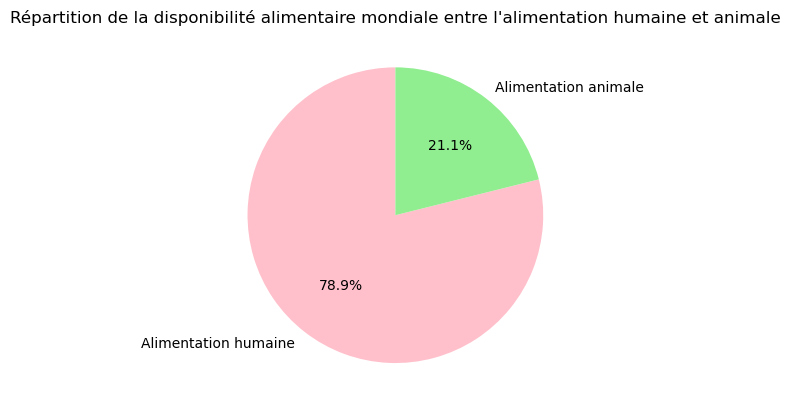

In [57]:
#Représentation Graphique
# Calcul de deux proportions
sizes = [data_dispo_aliment_HA['Nourriture (milliers de tonnes)'].sum(), 
         data_dispo_aliment_HA['Aliments pour animaux (milliers de tonnes)'].sum()]

labels = ['Alimentation humaine', 'Alimentation animale']
colors = ['pink','lightgreen']

# Creation de la representation en camembert
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Répartition de la disponibilité alimentaire mondiale entre l\'alimentation humaine et animale')

plt.show()

### c. Uilisation du Manioc

4.3 [Julien](#4.3.-Julien) 

In [58]:
# disponibilité du Manioc et son utilisation dans le monde
dispo_man_util = data_dispo_alimentaire[['Pays','Aliments pour animaux (milliers de tonnes)','Disponibilité intérieure (milliers de tonnes)','Exportations (milliers de tonnes)','Importations (milliers de tonnes)','Nourriture (milliers de tonnes)','Résidus (milliers de tonnes)','Production (milliers de tonnes)']]
dispo_man_util.sort_values(by='Exportations (milliers de tonnes)',ascending=False)

,Pays,Aliments pour animaux (milliers de tonnes),Disponibilité intérieure (milliers de tonnes),Exportations (milliers de tonnes),Importations (milliers de tonnes),Nourriture (milliers de tonnes),Résidus (milliers de tonnes),Production (milliers de tonnes)
2159,Brésil,637.0,38086.0,42797.0,283.0,725.0,NaN,81700.0
15420,États-Unis d'Amérique,2240.0,52672.0,39184.0,1267.0,12.0,591.0,91389.0
15352,États-Unis d'Amérique,6196.0,34051.0,34691.0,5491.0,25742.0,NaN,57967.0
2161,Brésil,NaN,12067.0,27728.0,10.0,7937.0,NaN,39494.0
2130,Brésil,40487.0,54737.0,26780.0,979.0,5612.0,8145.0,80538.0
...,...,...,...,...,...,...,...,...
15598,Îles Salomon,NaN,0.0,NaN,0.0,0.0,NaN,NaN
15599,Îles Salomon,NaN,3.0,NaN,2.0,3.0,NaN,1.0
15600,Îles Salomon,NaN,3.0,NaN,0.0,3.0,NaN,2.0
15601,Îles Salomon,NaN,2.0,NaN,2.0,2.0,NaN,0.0


In [59]:
#Calcul de la proportion de personnes en sous nutrition durant la periode 2013-2018 au thailande
jointhai = pd.merge(data_population,data_sous_nutrition,on=['Pays','Année'])
data_sous_nutrition_Thaïlande = jointhai[jointhai['Pays']=='Thaïlande']
data_sous_nutrition_Thaïlande['Ratio (%)'] = round(data_sous_nutrition_Thaïlande['Nombre sous nourris (Millions)']*1000*100/data_sous_nutrition_Thaïlande['Population (milliers d\'habitants)'],2)
data_sous_nutrition_Thaïlande

C:\Users\Dell\AppData\Local\Temp\ipykernel_2548\266002237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sous_nutrition_Thaïlande['Ratio (%)'] = round(data_sous_nutrition_Thaïlande['Nombre sous nourris (Millions)']*1000*100/data_sous_nutrition_Thaïlande['Population (milliers d\'habitants)'],2)


,Pays,Année,Population (milliers d'habitants),Nombre sous nourris (Millions),Ratio (%)
463,Thaïlande,2013,68144.518,6.2,9.10
464,Thaïlande,2014,68438.746,6.0,8.77
465,Thaïlande,2015,68714.511,5.9,8.59
466,Thaïlande,2016,68971.308,6.0,8.70
467,Thaïlande,2017,69209.810,6.2,8.96
468,Thaïlande,2018,69428.453,6.5,9.36


In [60]:
# Filtrer les données pour la Thaïlande et le manioc
dispo_man_thai = data_dispo_alimentaire.loc[(data_dispo_alimentaire['Pays'] == 'Thaïlande') & (data_dispo_alimentaire['Produit'] == 'Manioc')]
dispo_man_thai

,Pays,Produit,Origine,Aliments pour animaux (milliers de tonnes),Autres Utilisations (milliers de tonnes),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Exportations (milliers de tonnes),Importations (milliers de tonnes),Nourriture (milliers de tonnes),Résidus (milliers de tonnes),Production (milliers de tonnes),Semences (milliers de tonnes),Transformés (milliers de tonnes),Variation de stock (milliers de tonnes)
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


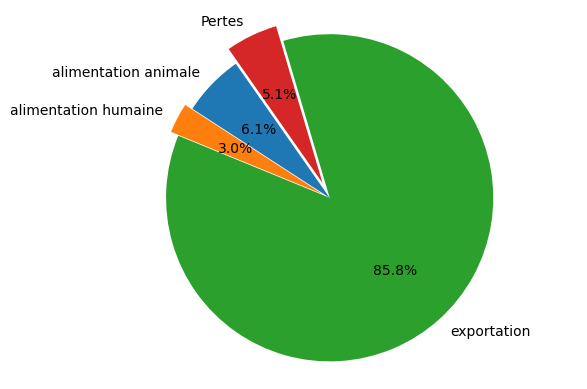

In [61]:
#repartition de diponibilité du manioc produit
#Proportion du Manioc utilisée pour l'alimentation humaine
manioc_nourrit = round(dispo_man_thai['Nourriture (milliers de tonnes)']*100/dispo_man_thai['Production (milliers de tonnes)'],2)
manioc_nourrit = manioc_nourrit.iloc[0]

#Proportion du Manioc dirigé vers l'exportation
propo_expor_prod = round(dispo_man_thai['Exportations (milliers de tonnes)']*100/dispo_man_thai['Production (milliers de tonnes)'],2)
propo_expor_prod = propo_expor_prod.iloc[0]

#Proportion du Manioc dirigé vers l'exportation
manioc_animal = round(dispo_man_thai['Aliments pour animaux (milliers de tonnes)']*100/dispo_man_thai['Production (milliers de tonnes)'],2)
manioc_animal = manioc_animal.iloc[0]

manioc_perte = round(dispo_man_thai['Résidus (milliers de tonnes)']*100/dispo_man_thai['Production (milliers de tonnes)'],2)
manioc_perte = manioc_perte.iloc[0]

# Graphique
labels = ['alimentation animale', 'alimentation humaine', 'exportation', 'Pertes']
sizes = [manioc_animal, manioc_nourrit, propo_expor_prod, manioc_perte]
explode = (0, 0.05, 0 , 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=125)
ax1.axis('equal')

plt.show()

On remarque que l'exportation du Manioc au Thailande represente presque 86% de la quantité produite et les 14% restants se repartis entre l'alimentation animale (6% environ) et 5% comme des résidus ce qui ne laisse que 3% pour la nourriture humaine dans le temps ou la Thailande compte en moyenne un Ratio de population en sous nutrition de 8.9% de la population totale.

In [62]:
round(data_sous_nutrition_Thaïlande['Ratio (%)'].mean(),1)

8.9

[Retour au début](#Sommaire:)